# 2 (b)

In [10]:
from pyomo.environ import *   #The Pyomo package is imported, which will be used to solve these linear problems
import numpy as np                 

In this section a model is created and the variables and constraints from the problem are defined in this model, as wellk as the OF. The variable bounds can be changed, corresponding to the relaxed constraints during branching

In [11]:
model = AbstractModel()                        #An abstract model is initated that wil be defined with additional components
model.x1 = Var(bounds=(0.8,5) , within=NonNegativeReals)  # The X1 variable is added to the model, with its limits defined 
model.x2 = Var(bounds=(0.9,5), within=NonNegativeReals)   # The X2 variable is added to the model, with its limits defined
model.con1 = Constraint(expr=-18*model.x1+model.x2 <= 4)  # The expression for constraint number one is added to the model
model.con2 = Constraint(expr=-2*model.x1+2*model.x2 >= -5) # The expression for constraint number one is added to the model

def obj_rule(model):
    return 8*model.x1+10*model.x2                       # The objective function is added to the model
model.OF = Objective(rule=obj_rule,sense=minimize)       # It is declared that the OF should be minimized

In [12]:
opt = SolverFactory('glpk')            #This solver is used to solve linear programming problems
instance = model.create_instance()
results = opt.solve(instance) # solves and updates instance
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  result.solver.status)

feasible


In [13]:
print('X1=',round(value(instance.x1),2))   #The values of X1 and X2, as well as the OFare computed for each set of constraints
print('X2=',round(value(instance.x2),2))
print('OF=',round(value(instance.OF),2))

X1= 0.8
X2= 0.9
OF= 15.4


# Question 4 

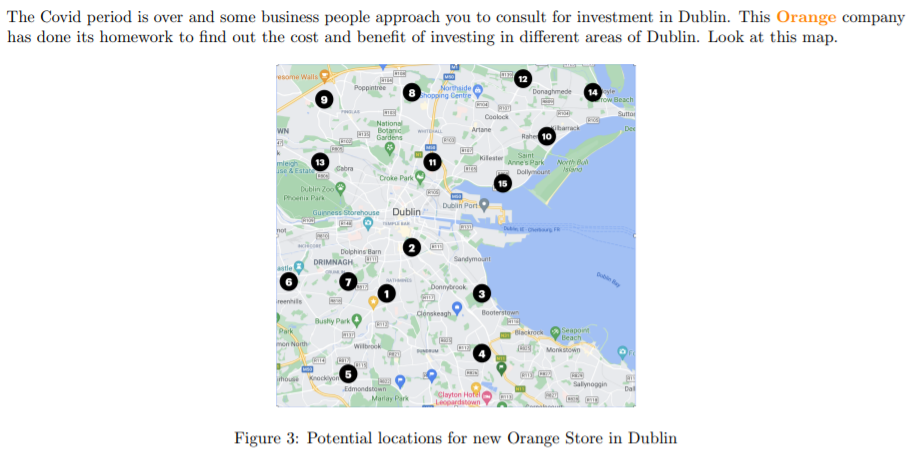

In [3]:
from IPython.display import Image
Image(filename="img/stores_map.png", width=700,height=700)

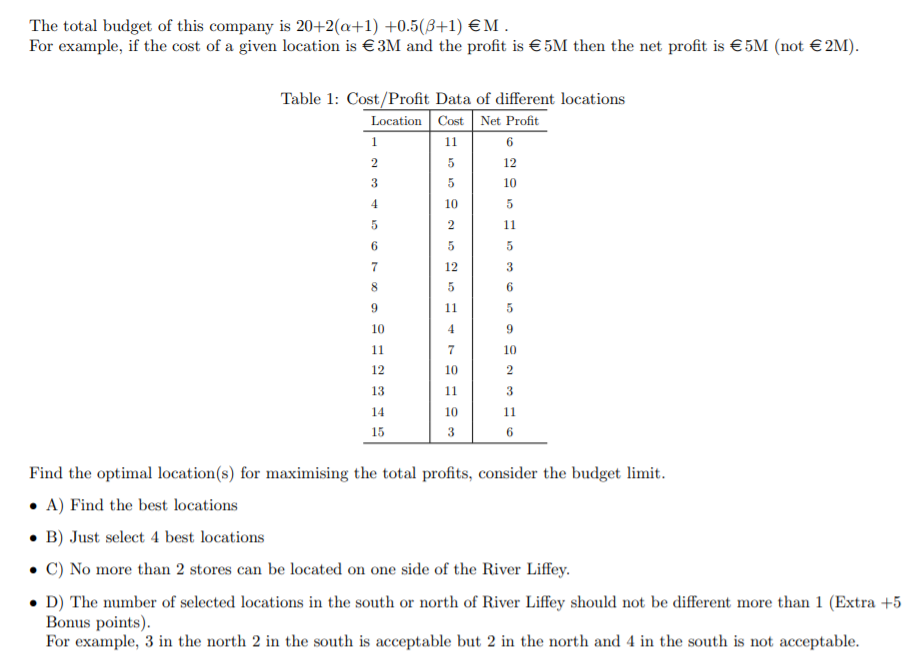

In [2]:
from IPython.display import Image
Image(filename="img/stores.png", width=700,height=700)

# Q4 (a) 

A model is again created with the given constraint for Q4, that the cost of choosing multiple locations may not exceed the budget. Using the data from assignment1_Q4.dat file containing the cost and profit of each location the best locations are computed. These must be within the budget of 32.5 million euro


In [449]:
model       = AbstractModel()     #Model Created
model.i     = Set()               # A set created containing all 15 locations

model.totalcost = Param(mutable=True)   # The company's budget is set as a parameter

model.U = Var(model.i,within=Binary)    # A binary variable is declared to indicate whether a location is being used or not

model.cost = Param(model.i,mutable=True)   # A parameter that describes the cost of each location
model.profit = Param(model.i,mutable=True)  # A parameter that describes the profit brought about by each location


def con1_rule(model,i):      # Constarining the solver to not exceed the budget when choosing new locations for the company
    return sum( model.U[i]*model.cost[i] for i in model.i) <= model.totalcost
model.con1 = Constraint(model.i,rule=con1_rule)


def obj_rule(model):        # The objective function that tries to maximise the profit yield by choosing new locations
    return sum( model.U[i]*model.profit[i] for i in model.i )
model.OF = Objective(rule=obj_rule,sense=maximize)

In [450]:
instance = model.create_instance("assignment1_Q4.dat")  # Data from the .dat file populates the params and sets

In [451]:
opt = SolverFactory('glpk')
results = opt.solve(instance) # solves and updates instance

In [452]:
#instance.display()
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  result.solver.status)

feasible


In [453]:
for i in instance.i:  #Loop through set of locations
    print(i, round(value(instance.U[i]),2))   #prints each location and shows whether the model has chosen it or not
investmentCost = sum( value(instance.U[i]*instance.cost[i]) for i in instance.i)  #Shows the total cost of the chosen lcoations
print("Total Cost of investment = ", investmentCost)
print('OF=',round(value(instance.OF),2))


l1 0.0
l2 1.0
l3 1.0
l4 0.0
l5 1.0
l6 0.0
l7 0.0
l8 1.0
l9 0.0
l10 1.0
l11 1.0
l12 0.0
l13 0.0
l14 0.0
l15 1.0
Total Cost of investment =  31.0
OF= 64.0


# 4 (b)

Only the 4 best locations are chosen in this case. This is achieved by adding a new constraints that says that the binary variable that inicates if a location is chosen should be 1 exactly four times.

In [445]:
model       = AbstractModel()
model.i     = Set()

model.totalcost = Param(mutable=True)

model.U = Var(model.i,within=Binary)

model.cost = Param(model.i,mutable=True)
model.profit = Param(model.i,mutable=True)


def con1_rule(model,i):
    return sum( model.U[i]*model.cost[i] for i in model.i) <= model.totalcost
model.con1 = Constraint(model.i,rule=con1_rule)

def con2_rule(model,i):
    return sum(model.U[i] for i in model.i) == 4    # New constarint that ensures that only 4 locations are chosen
model.con2 = Constraint(model.i,rule=con2_rule)     




def obj_rule(model):
    return sum( model.U[i]*model.profit[i] for i in model.i )
model.OF = Objective(rule=obj_rule,sense=maximize)

In [446]:
instance = model.create_instance("assignment1_Q4.dat")
opt = SolverFactory('glpk')
results = opt.solve(instance) # solves and updates instance

In [447]:
#instance.display()
if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
    print('feasible')
elif (results.solver.termination_condition == TerminationCondition.infeasible):
    print('infeasible')
else:
    print ('Solver Status:',  result.solver.status)

feasible


4 locations are chosen. This new constraint has deteriated the OF as the  profit is now smaller than in part A

In [448]:
for i in instance.i:
    print(i, round(value(instance.U[i]),2)) 
investmentCost = sum( value(instance.U[i]*instance.cost[i]) for i in instance.i)
print("Total Cost of investment = ", investmentCost)
print('OF=',round(value(instance.OF),2))


l1 0.0
l2 1.0
l3 1.0
l4 0.0
l5 1.0
l6 0.0
l7 0.0
l8 0.0
l9 0.0
l10 0.0
l11 0.0
l12 0.0
l13 0.0
l14 1.0
l15 0.0
Total Cost of investment =  22.0
OF= 44.0


# 4 (c)

In this case only 2 locations in the North and South of the Liffey should be chosen. A new .dat file is created called assignment1_Q4_CandD.dat. In this file two sets are created for Northern and Southern locations. Two constraints are added that say that no more than locations from each set should be chosen.

In [439]:
model       = AbstractModel()
model.i     = Set()            # Set containing southern locations
model.j     = Set()            # Set containing northern locations

model.totalcost = Param(mutable=True)

model.U_S = Var(model.i,within=Binary)
model.U_N = Var(model.j,within=Binary)

model.cost_S = Param(model.i,mutable=True)
model.profit_S = Param(model.i,mutable=True)
model.cost_N = Param(model.j,mutable=True)
model.profit_N = Param(model.j,mutable=True)


def con1_rule(model,i):
    return sum( model.U_S[i]*model.cost_S[i] for i in model.i)+sum( model.U_N[j]*model.cost_N[j] for j in model.j) <= model.totalcost
model.con1 = Constraint(model.i,rule=con1_rule)


def con3_rule(model,i):
    return sum(model.U_S[i] for i in model.i) <= 2          #No more than 2 southern locations may be chosen
model.con3 = Constraint(model.i,rule=con3_rule)            

def con4_rule(model,j):
    return sum(model.U_N[j] for j in model.j) <= 2          #No more than 2 northern locations may be chosen
model.con4 = Constraint(model.j,rule=con4_rule)


def obj_rule(model):
    return sum( model.U_S[i]*model.profit_S[i] for i in model.i )+sum( model.U_N[j]*model.profit_N[j] for j in model.j )
model.OF = Objective(rule=obj_rule,sense=maximize)

In [440]:
instance = model.create_instance("assignment1_Q4_CandD.dat")
opt = SolverFactory('glpk')
results = opt.solve(instance) # solves and updates instance

The printed results show that no more than 2 locations from each side are chosen. 

In [441]:
for i in instance.i:
    print(i, round(value(instance.U_S[i]),2)) 
for j in instance.j:
    print(j, round(value(instance.U_N[j]),2)) 
investmentCost = sum( value(instance.U_S[i]*instance.cost_S[i]) for i in instance.i)+sum( value(instance.U_N[j]*instance.cost_N[j]) for j in instance.j)
print("Total Cost of investment = ", investmentCost)
print('OF=',round(value(instance.OF),2))

Sl1 0.0
Sl2 1.0
Sl3 0.0
Sl4 0.0
Sl5 1.0
Sl6 0.0
Sl7 0.0
Nl8 0.0
Nl9 0.0
Nl10 0.0
Nl11 1.0
Nl12 0.0
Nl13 0.0
Nl14 1.0
Nl15 0.0
Total Cost of investment =  24.0
OF= 44.0


# Q4 (d)

In this case the number of chosen lcoations on either side of the Liffey should not differ by more than 1. This was achieved by setting a constraint that says the number of binary variable that have a value of 1 for each set subtracted should not differ by more than 1:
abs(U_N - U_S) <=1
In this form using an absolute value operation the problem becomes non-linear. To keep it linear it can be slit into two constarints seen in con2 and con3, which essentially achieves the same desired result.

In [442]:
model       = AbstractModel()
model.i     = Set()
model.j     = Set()

model.totalcost = Param(mutable=True)

model.U_S = Var(model.i,within=Binary)
model.U_N = Var(model.j,within=Binary)

model.cost_S = Param(model.i,mutable=True)
model.profit_S = Param(model.i,mutable=True)
model.cost_N = Param(model.j,mutable=True)
model.profit_N = Param(model.j,mutable=True)


def con1_rule(model,i):
    return sum( model.U_S[i]*model.cost_S[i] for i in model.i)+sum( model.U_N[j]*model.cost_N[j] for j in model.j) <= model.totalcost
model.con1 = Constraint(model.i,rule=con1_rule)

def con2_rule(model,i):
    return sum(model.U_S[i] for i in model.i)-sum(model.U_N[j] for j in model.j) <= 1   # The number of south locations should not exceed the number of northern location by more than 1
model.con2 = Constraint(model.i,rule=con2_rule)

def con3_rule(model,i):
    return sum(model.U_N[j] for j in model.j) - sum(model.U_S[i] for i in model.i) <= 1  # The number of north locations should not exceed the number of southern location by more than 1
model.con3 = Constraint(model.i,rule=con3_rule)

def obj_rule(model):
    return sum( model.U_S[i]*model.profit_S[i] for i in model.i )+sum( model.U_N[j]*model.profit_N[j] for j in model.j )
model.OF = Objective(rule=obj_rule,sense=maximize)

In [443]:
instance = model.create_instance("assignment1_Q4_CandD.dat")
opt = SolverFactory('glpk')
results = opt.solve(instance) # solves and updates instance

The printed results show that the number of locations in the north and south will never differ by more than 1. For verification purposes all locations on one side of the river were briefly changed to undesirable parameters to ensure that the solver would not pick all of the better options on one side of the river. It followed the constarints regardless, proving its effectivness.

In [444]:
for i in instance.i:
    print(i, round(value(instance.U_S[i]),2)) 
for j in instance.j:
    print(j, round(value(instance.U_N[j]),2)) 
investmentCost = sum( value(instance.U_S[i]*instance.cost_S[i]) for i in instance.i)+sum( value(instance.U_N[j]*instance.cost_N[j]) for j in instance.j)
print("Total Cost of investment = ", investmentCost)
print('OF=',round(value(instance.OF),2))

Sl1 0.0
Sl2 1.0
Sl3 1.0
Sl4 0.0
Sl5 1.0
Sl6 0.0
Sl7 0.0
Nl8 1.0
Nl9 0.0
Nl10 1.0
Nl11 1.0
Nl12 0.0
Nl13 0.0
Nl14 0.0
Nl15 1.0
Total Cost of investment =  31.0
OF= 64.0
